In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(250, 250, 3))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

In [3]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 250, 250, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                         

In [5]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

In [7]:
import os, shutil, pathlib

In [8]:
new_base_dir = pathlib.Path("chest_xray")

In [9]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(250, 250),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "val",
    image_size=(250, 250),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(250, 250),
    batch_size=32)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [11]:
%%time
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
163/163 [==============================] - 248s 2s/step - loss: 0.4355 - accuracy: 0.8482 - val_loss: 0.3215 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 253s 2s/step - loss: 0.1696 - accuracy: 0.9356 - val_loss: 0.5956 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 256s 2s/step - loss: 0.1221 - accuracy: 0.9569 - val_loss: 0.4087 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 241s 1s/step - loss: 0.1025 - accuracy: 0.9659 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 275s 2s/step - loss: 0.0806 - accuracy: 0.9709 - val_loss: 0.1982 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 281s 2s/step - loss: 0.0676 - accuracy: 0.9753 - val_loss: 0.1094 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 282s 2s/step - loss: 0.0558 - accuracy: 0.9793 - val_loss: 0.0545 - val_accuracy: 1.0000

In [12]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

20/20 [==============================] - 11s 407ms/step - loss: 0.8051 - accuracy: 0.7981
Test accuracy: 0.798


In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [40]:
model = keras.models.load_model("convnet_from_scratch.keras")

Pneumonia


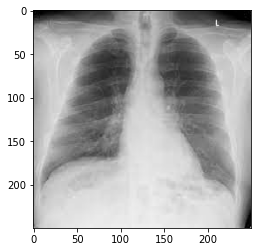

Pneumonia


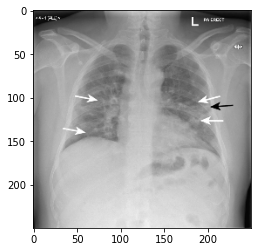

Pneumonia


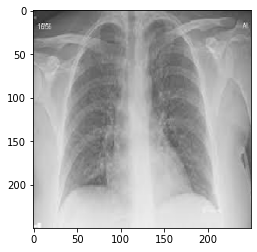

Pneumonia


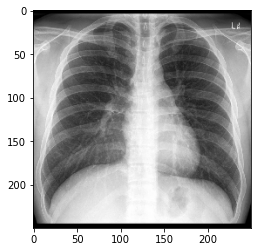

Normal


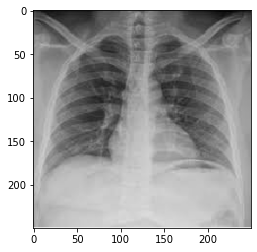

In [41]:
for i in range(1, 6):
    img_path = f"to_test/{i}.jpg"
    
    img = image.load_img(img_path, target_size=(250, 250))
    
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_batch)
    if np.round(prediction, 2) > 0.5:
        print('Pneumonia')
    else:
        print('Normal')
        
    plt.imshow(img);
    plt.show();